In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 10.0)
images_path = './im/'

In [60]:
def EM_binar(image):
    cv2.setRNGSeed(5)

    # Define parameters
    n_clusters = 2 
    covariance_type = 0 # 0: covariance matrix spherical. 1: covariance matrix diagonal. 2: covariance matrix generic
    n_iter = 10
    epsilon = 0.2

    # Create EM empty object
    em = cv2.ml.EM_create()

    # Set parameters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, n_iter, epsilon)
    em.setClustersNumber(n_clusters)
    em.setCovarianceMatrixType(covariance_type)
    em.setTermCriteria(criteria)

    # Flatten image
    flattened_img = image.reshape((-1,1))
    flattened_img = np.float32(flattened_img)

    # Apply EM
    _, _, labels, _ = em.trainEM(flattened_img)

    # Reshape labels to image size (binarization)
    binarized = labels.reshape((image.shape))

    return binarized

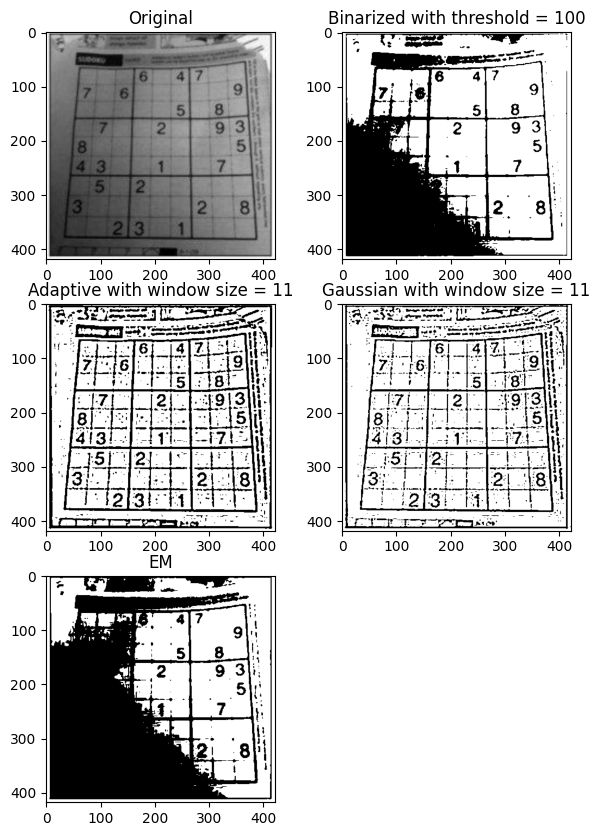

In [61]:
image = cv2.imread(images_path + 'sudoku.png', 0)

th = 100
_,imageTH = cv2.threshold(image, th, 255, cv2.THRESH_BINARY)

sz = 11
imageMeanTH = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, sz, 4)

imageGaussTH = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, sz, 4)

EM = EM_binar(image)

plt.subplot(321)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(322)
plt.title('Binarized with threshold = ' +  str(th))
plt.imshow(imageTH, cmap='gray')

plt.subplot(323)
plt.title('Adaptive with window size = ' +  str(sz))
plt.imshow(imageMeanTH, cmap='gray')

plt.subplot(324)
plt.title('Gaussian with window size = ' +  str(sz))
plt.imshow(imageGaussTH, cmap='gray')

plt.subplot(325)
plt.title('EM')
plt.imshow(EM, cmap='gray')

plt.show()

In [71]:
def binarize_kmeans(image,K):
    """ Binarize an image using k-means.   

        Args:
            image: Input image
            it: K-means iteration
    """    
    
    # Set random seed for centroids 
    cv2.setRNGSeed(124)
    
    # Flatten image
    flattened_img = image.reshape((-1,3))
    flattened_img = np.float32(flattened_img)
    
    #Set epsilon
    epsilon = 0.2
    
    it = 10
    
    # Estabish stopping criteria (either `it` iterations or moving less than `epsilon`)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, it, epsilon)
    
    # Set K parameter (2 for thresholding)
    
    
    # Call kmeans using random initial position for centroids
    _,label,center=cv2.kmeans(flattened_img,K,None,criteria,it,cv2.KMEANS_RANDOM_CENTERS)
    
    # Colour resultant labels
    center = np.uint8(center) # Get center coordinates as unsigned integers   
    print(center)
    flattened_img = center[label.flatten()] # Get the color (center) assigned to each pixel
    
    # Reshape vector image to original shape
    binarized = flattened_img.reshape((image.shape))
    return binarized

[[251 249 249]
 [252 252  47]
 [243  24  37]
 [ 63 249  32]
 [245 153  22]
 [  8   7   7]
 [ 74  74  71]
 [ 36  69 247]]


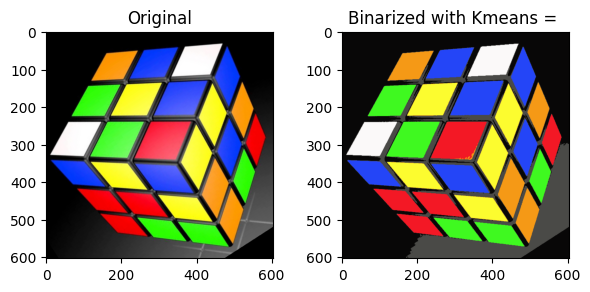

In [75]:
tower = cv2.imread(images_path + 'cube.png', -1)

tower = cv2.cvtColor(tower, cv2.COLOR_BGR2RGB)
kTower = binarize_kmeans(tower, 8)

plt.subplot(321)
plt.title('Original')
plt.imshow(tower, cmap='gray')

plt.subplot(322)
plt.title('Binarized with Kmeans')
plt.imshow(kTower, cmap='gray')

plt.show()